In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
neq = 10000

In [3]:
wkdir = os.getcwd()
datadir = wkdir + "/data/"

In [4]:
all_data_files = []
for datafile in os.listdir(datadir):
    if datafile.endswith('.csv'):
        all_data_files.append(datafile)

In [5]:
all_data_files

['ising_MC_T_1.200_J_1.000_L_10.csv',
 'ising_MC_T_2.600_J_1.000_L_10.csv',
 'ising_MC_T_3.600_J_1.000_L_10.csv',
 'ising_MC_T_3.400_J_1.000_L_10.csv',
 'ising_MC_T_1.400_J_1.000_L_10.csv',
 'ising_MC_T_1.600_J_1.000_L_10.csv',
 'ising_MC_T_2.200_J_1.000_L_10.csv',
 'ising_MC_T_0.800_J_1.000_L_10.csv',
 'ising_MC_T_0.200_J_1.000_L_10.csv',
 'ising_MC_T_2.800_J_1.000_L_10.csv',
 'ising_MC_T_0.600_J_1.000_L_10.csv',
 'ising_MC_T_2.400_J_1.000_L_10.csv',
 'ising_MC_T_2.000_J_1.000_L_10.csv',
 'ising_MC_T_3.200_J_1.000_L_10.csv',
 'ising_MC_T_0.400_J_1.000_L_10.csv',
 'ising_MC_T_1.800_J_1.000_L_10.csv',
 'ising_MC_T_3.000_J_1.000_L_10.csv',
 'ising_MC_T_1.000_J_1.000_L_10.csv',
 'ising_MC_T_3.800_J_1.000_L_10.csv',
 'ising_MC_T_4.000_J_1.000_L_10.csv']

In [6]:
df = pd.read_csv(datadir+all_data_files[0])
for i in range(1,len(all_data_files)):
    df2 = pd.read_csv(datadir+all_data_files[i])
    df = pd.concat([df, df2])
nulldata = df[df['T'].isna()]
print("There were "+str(len(nulldata))+" NaN entries in all data files")
#df.describe()
df = df.dropna()
df["T/J"] = df["T"]/(df["J"])
df["E/N"] = df["E"]/(df["L"]*df["L"])

There were 0 NaN entries in all data files


In [7]:
nulldata

,step,E,T,J,L


In [8]:
df.head()

,step,E,T,J,L,T/J,E/N
0,0,-160.000000,1.2,1.0,10,1.2,-1.600000
1,1,-286.666667,1.2,1.0,10,1.2,-2.866667
2,2,-294.666667,1.2,1.0,10,1.2,-2.946667
3,3,-310.666667,1.2,1.0,10,1.2,-3.106667
4,4,-326.666667,1.2,1.0,10,1.2,-3.266667


In [9]:
df.describe()

,step,E,T,J,L,T/J,E/N
count,4.000000e+06,4.000000e+06,4.000000e+06,4000000.0,4000000.0,4.000000e+06,4.000000e+06
mean,9.999950e+04,-2.905702e+02,2.100000e+00,1.0,10.0,2.100000e+00,-2.905702e+00
std,5.773503e+04,1.244053e+02,1.153256e+00,0.0,0.0,1.153256e+00,1.244053e+00
min,0.000000e+00,-4.400000e+02,2.000000e-01,1.0,10.0,2.000000e-01,-4.400000e+00
25%,4.999975e+04,-4.066667e+02,1.150000e+00,1.0,10.0,1.150000e+00,-4.066667e+00
50%,9.999950e+04,-3.396364e+02,2.100000e+00,1.0,10.0,2.100000e+00,-3.396364e+00
75%,1.499992e+05,-1.615385e+02,3.050000e+00,1.0,10.0,3.050000e+00,-1.615385e+00
max,1.999990e+05,4.700000e+01,4.000000e+00,1.0,10.0,4.000000e+00,4.700000e-01


In [10]:
means = df[df["step"]>neq].groupby(["T/J"]).mean()

In [11]:
means.head()

,step,E,T,J,L,E/N
T/J,,,,,,
0.2,105000.0,-440.000000,0.2,1.0,10.0,-4.400000
0.4,105000.0,-420.000000,0.4,1.0,10.0,-4.200000
0.6,105000.0,-413.330975,0.6,1.0,10.0,-4.133310
0.8,105000.0,-409.922142,0.8,1.0,10.0,-4.099221
1.0,105000.0,-407.434586,1.0,1.0,10.0,-4.074346


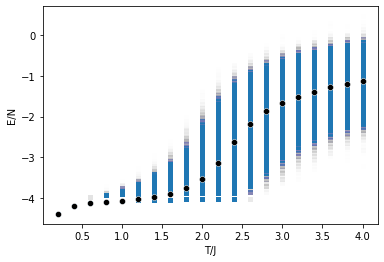

In [16]:
ax = sns.scatterplot(data = df[df["step"]>neq], x = "T/J", y = "E/N", alpha = 0.005)
ax = sns.scatterplot(data = means, x = "T/J", y = "E/N", color = "black", alpha = 1)